In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.listdir()

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'Participants_Data_DSSC_2023.zip',
 'README.md',
 'Solution_notebook.ipynb',
 'submission.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb',
 '__MACOSX']

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89861 entries, 0 to 89860
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_duration       89861 non-null  float64
 1   distance_traveled   89861 non-null  float64
 2   num_of_passengers   89861 non-null  float64
 3   fare                89861 non-null  int64  
 4   tip                 89861 non-null  int64  
 5   miscellaneous_fees  89861 non-null  float64
 6   total_fare          89861 non-null  int64  
 7   surge_applied       89861 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 5.5 MB


In [11]:
def missing(df):
    null=[]
    a=[]
    for i in df.columns:
        if df[i].isnull().sum()>0:
            null.append(round((df[i].isnull().sum()/df.shape[0])*100,2))
            a.append(i)
    return pd.DataFrame({"Column Name":a,"Null %":null})

In [12]:
missing(train)

,Column Name,Null %


In [13]:
missing(test)

,Column Name,Null %


In [26]:
from scipy import stats as st
def descriptive_data(df):
    avg=[round(df[i].mean(),2) for i in df.columns]
    mod=[st.mode(df[i])[0] for i in df.columns]
    std=[round(df[i].std(),2) for i in df.columns]
    vari=[round(train[i].var(),2) for i in df.columns]
    Q1=[df[i].quantile(.25) for i in df.columns]
    Q2=[df[i].quantile(.50) for i in df.columns]
    Q3=[df[i].quantile(.75) for i in df.columns]
    MiN=[round(train[i].min(),2) for i in df.columns]
    MaX=[round(train[i].max(),2) for i in df.columns]
    rang=[round((df[i].max()-df[i].min()),2) for i in df.columns]
    Skew=[round(train[i].skew(),2) for i in df.columns]
    Kurt=[round(train[i].kurt(),2) for i in df.columns]
    col=[i for i in df.columns]
    
    return(pd.DataFrame({"Column Name":col,"Mean":avg,"Mode":mod,"Standard Deviation":std,
                        "Variance":vari,"Q1":Q1,"Q2":Q2,"Q3":Q3,"Min":MiN,"Max":MaX,"Skewness":Skew,"Kurtosis":Kurt}))

In [27]:
descriptive_data(train)

,Column Name,Mean,Mode,Standard Deviation,Variance,Q1,Q2,Q3,Min,Max,Skewness,Kurtosis
0,trip_duration,1173.18,[491.0],4775.65,22806867.51,446.00,707.00,1098.00,0.00,86387.00,16.23,272.86
1,distance_traveled,5.05,[2.25],125.22,15679.40,1.95,3.20,5.73,0.02,57283.91,456.52,208825.80
2,num_of_passengers,1.29,[1.0],0.93,0.87,1.00,1.00,1.00,0.00,9.00,3.76,14.23
3,fare,99.62,[52.5],85.60,7327.82,52.50,75.00,116.25,0.00,4466.25,8.40,215.51
4,tip,13.03,[0],20.37,414.85,0.00,9.00,20.00,0.00,2500.00,17.91,1408.99
5,miscellaneous_fees,15.14,[6.0],12.55,157.59,6.00,9.75,26.45,-0.50,435.00,2.34,16.46
6,total_fare,127.79,[58.5],98.80,9760.92,70.20,101.70,152.25,0.00,4472.25,6.49,132.06
7,surge_applied,0.28,[0],0.45,0.20,0.00,0.00,1.00,0.00,1.00,0.98,-1.05


In [30]:
descriptive_data(test)

,Column Name,Mean,Mode,Standard Deviation,Variance,Q1,Q2,Q3,Min,Max,Skewness,Kurtosis
0,trip_duration,1148.18,[613.0],4611.48,22806867.51,446.00,705.00,1094.00,0.00,86387.00,16.23,272.86
1,distance_traveled,7.26,[2.25],554.97,15679.40,1.95,3.20,5.73,0.02,57283.91,456.52,208825.80
2,num_of_passengers,1.29,[1.0],0.92,0.87,1.00,1.00,1.00,0.00,9.00,3.76,14.23
3,fare,0.00,[0],0.00,7327.82,0.00,0.00,0.00,0.00,4466.25,8.40,215.51
4,tip,13.03,[0],18.69,414.85,0.00,9.00,20.00,0.00,2500.00,17.91,1408.99
5,miscellaneous_fees,15.19,[6.0],12.68,157.59,6.00,9.75,26.45,-0.50,435.00,2.34,16.46
6,total_fare,0.00,[0],0.00,9760.92,0.00,0.00,0.00,0.00,4472.25,6.49,132.06
7,surge_applied,0.28,[0],0.45,0.20,0.00,0.00,1.00,0.00,1.00,0.98,-1.05


In [28]:
def normality_check(df):
    for i in df.columns:
        sns.kdeplot(df[i],shade=True)
        plt.title("Density plot of "+str(i))
        plt.xlabel(i)
        plt.ylabel("Density")
        plt.show()

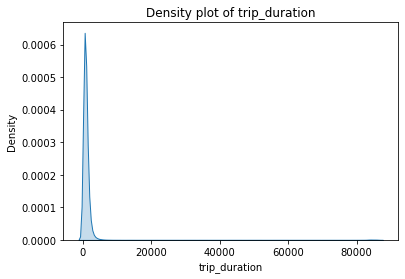

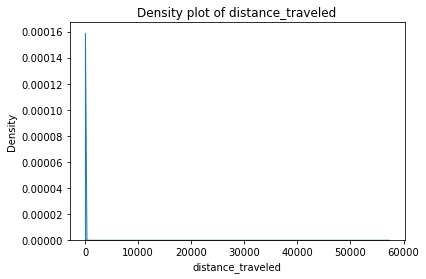

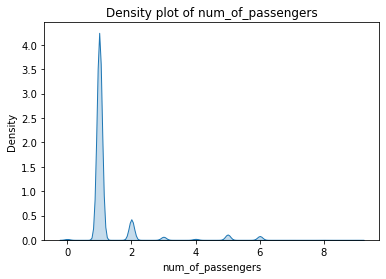

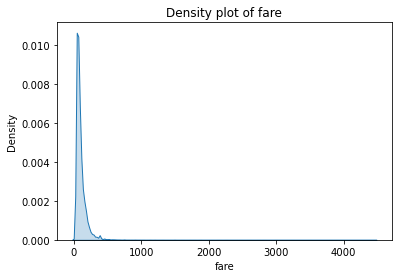

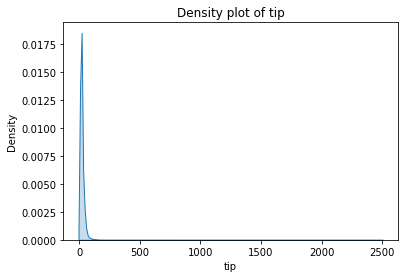

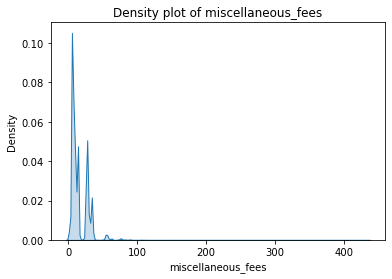

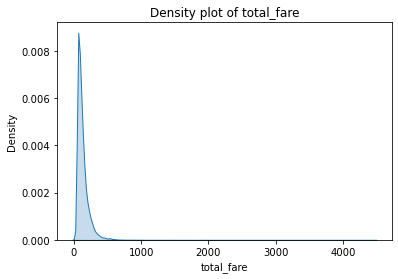

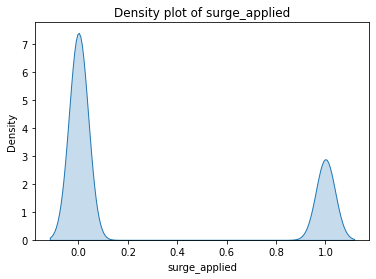

In [29]:
normality_check(train)

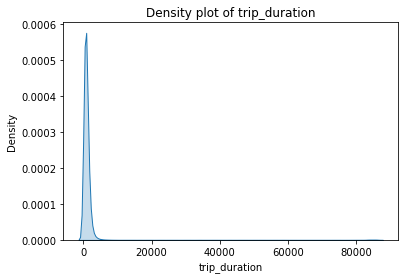

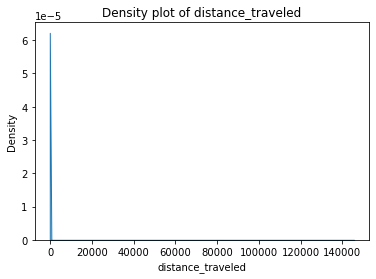

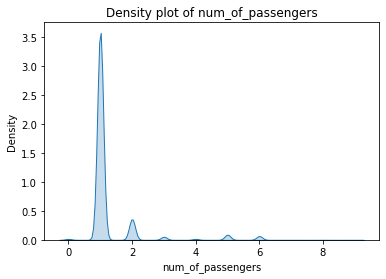

C:\Users\Sarkar\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


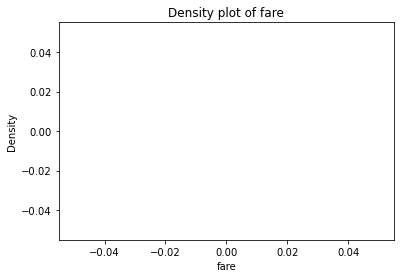

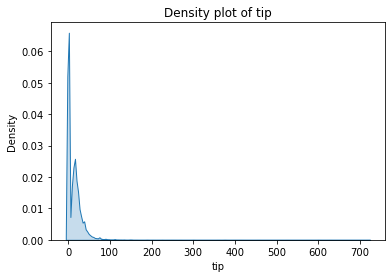

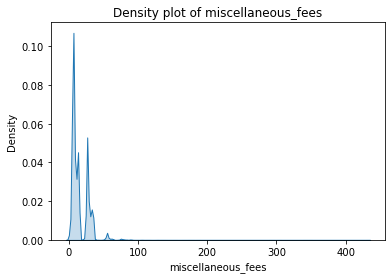

C:\Users\Sarkar\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


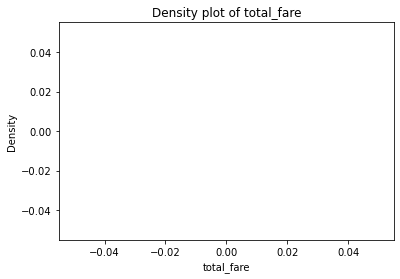

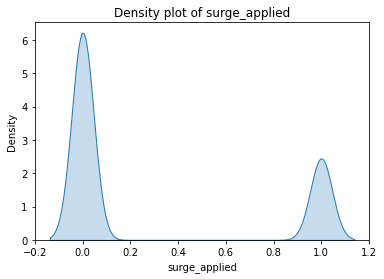

In [31]:
normality_check(test)